In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('LGD_DATA.csv')
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [4]:
df_new=pd.get_dummies(df,drop_first=True)
df_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [5]:
df_new=df_new.drop(['Ac_No'],axis=1)
df_new.head()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,24,5,1,203.319595,1,0
1,31,10,1,402.197302,0,1
2,56,37,1,553.132096,1,0
3,52,31,1,292.430579,0,0
4,20,3,1,246.540576,1,1


In [6]:
df1=pd.DataFrame(df_new)

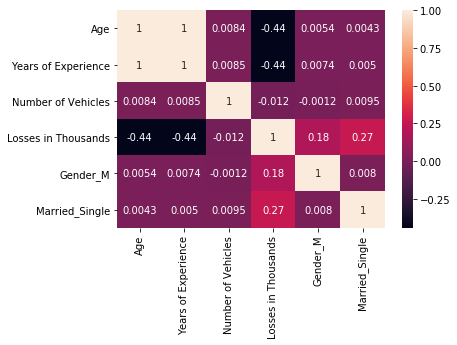

In [7]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [8]:
linreg1=LinearRegression()
linreg1.fit(pd.DataFrame(df1.iloc[:,[0,1,2,4,5]]),df1['Losses in Thousands'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
linreg1.intercept_

502.9204833236437

In [10]:
linreg1.coef_

array([ -3.80823766,  -2.43254505,  -2.69086413,  93.8563901 ,
       134.99809835])

In [11]:
df1['predicted values1']=linreg1.predict(df1.iloc[:,[0,1,2,4,5]])
print(df1['predicted values1'])


0        490.525580
1        492.846900
2        290.820534
3        226.792364
4        645.621719
5        464.186757
6        451.912806
7        125.882989
8        349.553547
9        574.295915
10       654.295047
11       505.328465
12       421.632321
13       219.739379
14       353.228361
15       279.714661
16       364.786497
17       650.486809
18       354.737477
19       248.510747
20       401.986544
21       664.344067
22       500.463375
23       264.689325
24       544.148854
25       564.491544
26       120.699058
27       392.048749
28       290.575884
29       419.199776
            ...    
15260    346.664885
15261    351.151901
15262    103.953138
15263    280.204170
15264    201.617766
15265    197.564879
15266    403.755358
15267    490.202887
15268    351.285325
15269    377.868798
15270    656.271475
15271    492.502008
15272    454.946086
15273    107.761376
15274    636.173434
15275    531.211171
15276    528.704436
15277    569.957370
15278    521.273377


In [12]:
SSE=sum((df1['Losses in Thousands']-df1['predicted values1'])**2)
print(SSE)

687046053.0556364


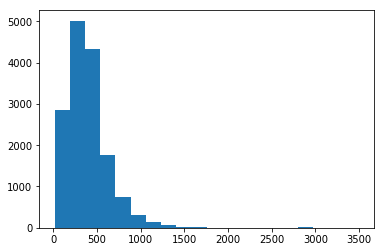

In [16]:
plt.hist(x=df1['Losses in Thousands'],bins=20)
plt.show()

In [14]:
n=df1.shape[0]
n

15290

In [15]:
RMSE=np.sqrt(SSE/n)
print(RMSE)

211.9772149014754


In [16]:
MAPE=(sum(abs((df1['Losses in Thousands']-df1['predicted values1'])/df1['Losses in Thousands'])))/n
MAPE

0.6970064185234688

In [17]:
TSS=sum((df1['Losses in Thousands']-np.mean(df1['Losses in Thousands']))**2)
print(TSS)

984284800.0314227


In [18]:
R2=1-(SSE/TSS)
print(R2)

0.3019844936813991
